In [1]:
import torch
print(torch.__version__)          # PyTorch version
print(torch.cuda.is_available())  # Should return True
print(torch.version.cuda)         # CUDA version

2.5.1
True
12.1


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

/home/priince365/anaconda3/envs/myenv/lib/python3.10/site-packages/diffusers/image_processor.py:147: RuntimeWarning: invalid value encountered in cast
  images = (images * 255).round().astype("uint8")


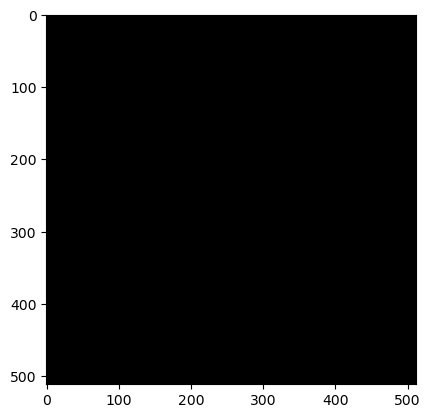

In [1]:
from diffusers import StableDiffusionPipeline
import torch

# Load model with float16 for lower VRAM usage
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", 
    torch_dtype=torch.float16,
    safety_checker=None,
)


pipe.to("cuda")

# Enable optimizations
pipe.enable_attention_slicing()

torch.backends.cudnn.benchmark = False  # Prevents instability

# Use more inference steps for better image quality
prompt = "lizard in a cityscape, vibrant colors, fantasy art"
image = pipe(prompt, num_inference_steps=50).images[0]
image.save("cityscape.png")





# dipaly the iage 

# print iamge using open cv 
import cv2
import matplotlib.pyplot as plt 
img = cv2.imread("cityscape.png")
plt.imshow(img)

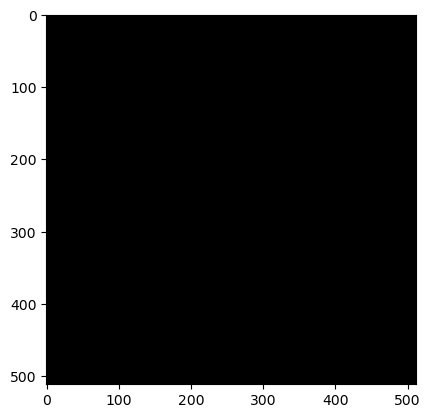

In [4]:
# print iamge using open cv 
import cv2
import matplotlib.pyplot as plt 
img = cv2.imread("cityscape.png")
plt.imshow(img)



In [ ]:

from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch
import cv2
import matplotlib.pyplot as plt 

# Load model in float16 to save VRAM
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    safety_checker=None,
)
pipe.to("cuda")
# Use a more stable scheduler
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

# Enable optimizations
pipe.enable_attention_slicing()
pipe.enable_model_cpu_offload()  # Helps with VRAM issues

# Ensure model is running on GPU
print(next(pipe.unet.parameters()).device)  # Should print: cuda:0
print(next(pipe.unet.parameters()).dtype)   # Should print: torch.float16

# Generate Image with Higher Steps
prompt = "lizard in a cityscape, vibrant colors, fantasy art"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
image.save("cityscape.png")

# Load and display image correctly
img = cv2.imread("cityscape.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Fix color issue
plt.imshow(img)
plt.axis("off")
plt.show()